In [ ]:
pip install face_recognition numpy matplotlib

In [4]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [9]:
# List of image paths
IMAGE_PATHS = [
    "face_1.jpg",
    "face_2.jpg"
]

Facial Landmarks for Face 1


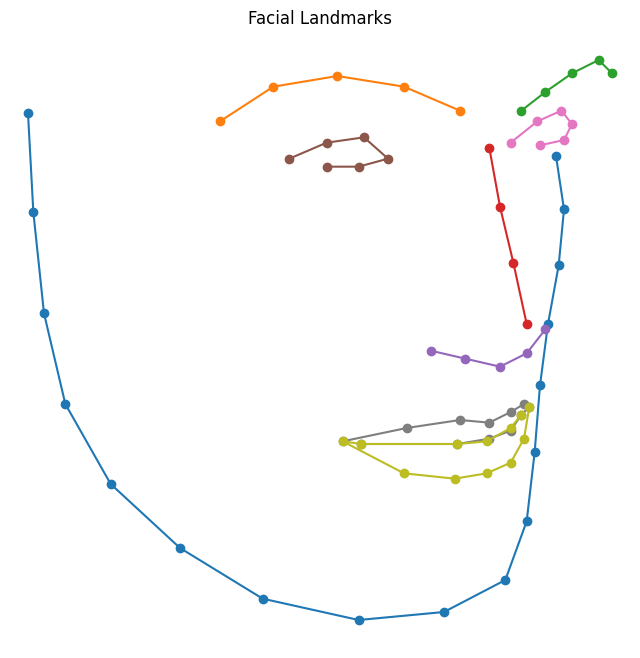

Facial Landmarks for Face 2


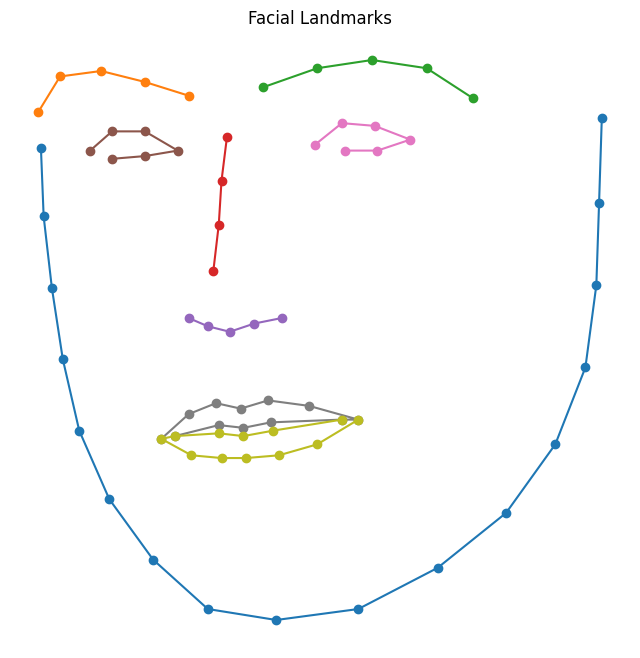

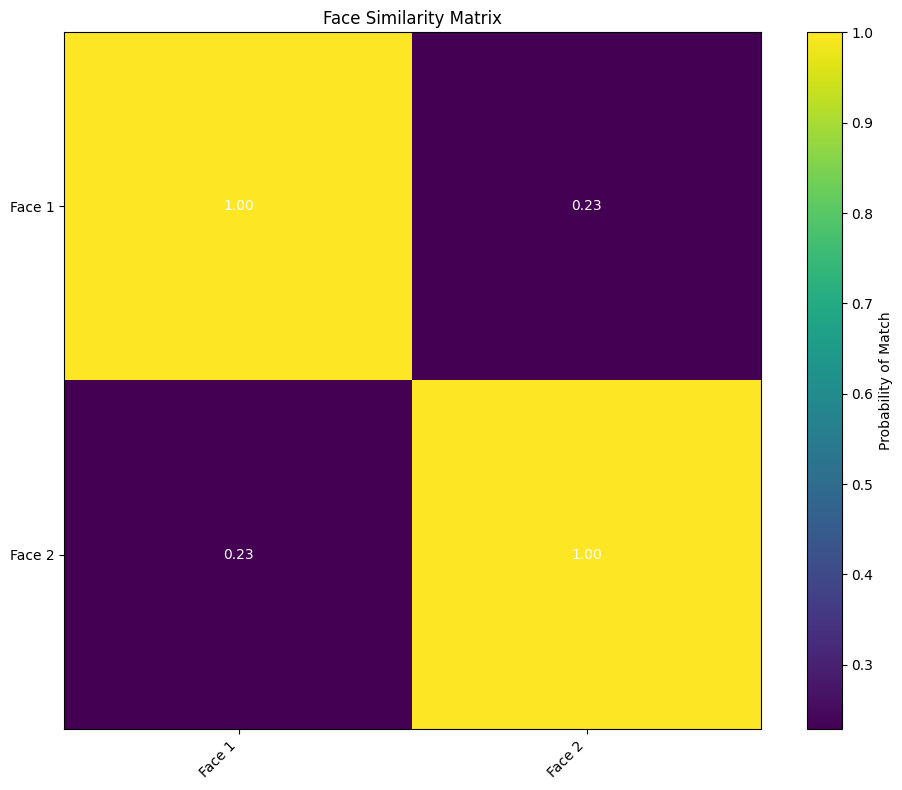


Match Probabilities:
Face 1 vs Face 2: 0.23


In [10]:
def load_and_encode_faces(image_paths: List[str]) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """
    Load images and encode faces.

    :param image_paths: List of paths to face images
    :return: Tuple of (face_encodings, face_landmarks)
    """
    face_encodings = []
    face_landmarks = []

    for image_path in image_paths:
        image = face_recognition.load_image_file(image_path)
        encoding = face_recognition.face_encodings(image)
        landmarks = face_recognition.face_landmarks(image)

        if encoding and landmarks:
            face_encodings.append(encoding[0])
            face_landmarks.append(landmarks[0])
        else:
            print(f"Warning: No face detected in {image_path}")

    return face_encodings, face_landmarks

def calculate_face_distances(face_encodings: List[np.ndarray]) -> np.ndarray:
    """
    Calculate the Euclidean distance between all pairs of face encodings.

    :param face_encodings: List of face encodings
    :return: 2D array of face distances
    """
    num_faces = len(face_encodings)
    distances = np.zeros((num_faces, num_faces))

    for i in range(num_faces):
        for j in range(i+1, num_faces):
            distance = face_recognition.face_distance([face_encodings[i]], face_encodings[j])[0]
            distances[i, j] = distance
            distances[j, i] = distance

    return distances

def distance_to_probability(distance: float, threshold: float = 0.6) -> float:
    """
    Convert a face distance to a probability of match.

    :param distance: Face distance
    :param threshold: Distance threshold for a match
    :return: Probability of match
    """
    if distance > threshold:
        return 0.0
    else:
        return 1.0 - (distance / threshold)

def plot_face_landmarks(landmarks: dict):
    """
    Plot facial landmarks.

    :param landmarks: Dictionary of facial landmarks
    """
    plt.figure(figsize=(8, 8))
    for facial_feature in landmarks.keys():
        pts = np.array(landmarks[facial_feature])
        plt.plot(pts[:, 0], -pts[:, 1], 'o-')
    plt.axis('equal')
    plt.axis('off')
    plt.title("Facial Landmarks")
    plt.show()

def plot_similarity_matrix(probabilities: np.ndarray, labels: List[str]):
    """
    Plot similarity matrix of face probabilities.

    :param probabilities: 2D array of match probabilities
    :param labels: Labels for each face
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(probabilities, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Probability of Match')
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.yticks(range(len(labels)), labels)
    plt.title("Face Similarity Matrix")
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f"{probabilities[i, j]:.2f}",
                     ha="center", va="center", color="w")
    plt.tight_layout()
    plt.show()



# Load and encode faces
face_encodings, face_landmarks = load_and_encode_faces(IMAGE_PATHS)

# Calculate face distances
distances = calculate_face_distances(face_encodings)

# Convert distances to probabilities
probabilities = np.array([[distance_to_probability(d) for d in row] for row in distances])

# Plot facial landmarks for each face
for i, landmarks in enumerate(face_landmarks):
    print(f"Facial Landmarks for Face {i+1}")
    plot_face_landmarks(landmarks)

# Plot similarity matrix
labels = [f"Face {i+1}" for i in range(len(IMAGE_PATHS))]
plot_similarity_matrix(probabilities, labels)

# Print match probabilities
print("\nMatch Probabilities:")
for i in range(len(IMAGE_PATHS)):
    for j in range(i+1, len(IMAGE_PATHS)):
        print(f"Face {i+1} vs Face {j+1}: {probabilities[i, j]:.2f}")